In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	#construct array of means by using numpy random choice to build an array of size (n_iterations, sample_size)
	#get the mean of each row (i.e. run) and store that in an array
	means = np.mean(np.random.choice(sample, size=(n_iterations, sample_size)), axis=1)
	data_mean = np.mean(means)
	lower = np.percentile(means, 2.5)
	upper = np.percentile(means, 97.5)
	return data_mean, lower, upper

(0.0, 100000.0)

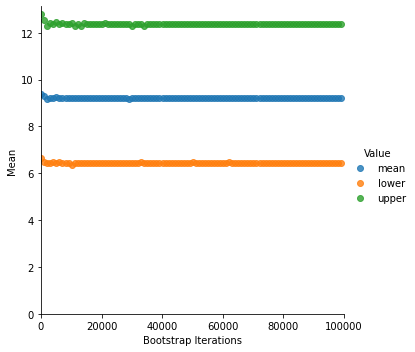

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	#construct array of means by using numpy random choice to build an array of size (n_iterations, sample_size)
	#get the mean of each row (i.e. run) and store that in an array
	means = np.mean(np.random.choice(sample, size=(iterations, sample_size)), axis=1)
	data_mean = np.mean(means)
	ci = (100 - ci)
	lower = np.percentile(means, (ci / 2))
	upper = np.percentile(means, (100 - (ci / 2)))
	return data_mean, lower, upper

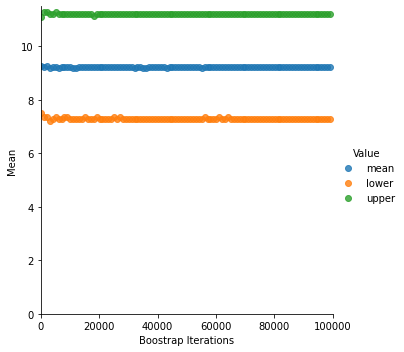

In [7]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset. A business is looking at changing their current vehicle fleet and replacing their vehicles with ones used by their competitors. They have captured the MPG of some of the cars in both fleets.
In the same jupyter nootebook:
Read the data for the vehicles from vehicles.csv
Create histograms and scatterplots for the current fleet and the proposed fleet
(3) Bootstrap on the vehicles dataset
The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
In the bootstrap notebook:
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
- Find the upper and lower bound of the mean of the current fleet.
- Do the same with the new fleet.
- Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)


(0.0, 100000.0)

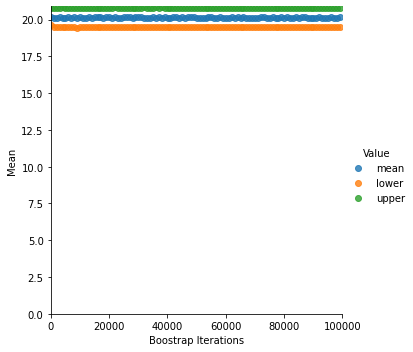

In [8]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# Note: you can add more cells as needed to organise your code and your plots
boots = []

#split data into fleets
oldfleet = data.values.T[0]
newfleet = data.values.T[1]
#remove NaN values from new fleet
newfleet = newfleet[~np.isnan(newfleet)]

data = oldfleet

for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 90)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



(0.0, 100000.0)

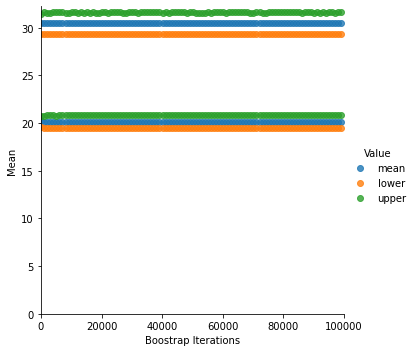

In [9]:
data = newfleet

for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 90)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [23]:
perm_test_data = np.concatenate((oldfleet, newfleet))
perm_test_data = np.random.permutation(perm_test_data)

perm_test_oldfleet = perm_test_data[:int(len(perm_test_data)/2)]
perm_test_newfleet = perm_test_data[int(len(perm_test_data)/2):]
n_perms_better = 0
t_obs = np.mean(newfleet) - np.mean(oldfleet)
print(t_obs)
t_perms = np.zeros(20000)

for i in range(20000):
    perm_test_data = np.random.permutation(perm_test_data)
    perm_test_oldfleet = perm_test_data[:int(len(perm_test_data)/2)]
    perm_test_newfleet = perm_test_data[int(len(perm_test_data)/2):]
    t_perm = np.mean(perm_test_newfleet) - np.mean(perm_test_oldfleet)
    t_perms[i] = t_perm
    if t_perm > t_obs:
        n_perms_better += 1

p_value = n_perms_better / 20000
print(p_value)

#p-value found is less than 0.5, so null hypothesis rejected, implying the new fleet is better than the old one

10.336434344974837
0.0
0
3.4390243902439046
